<a href="https://colab.research.google.com/github/shubham2721/shubham2721/blob/main/Amazon_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

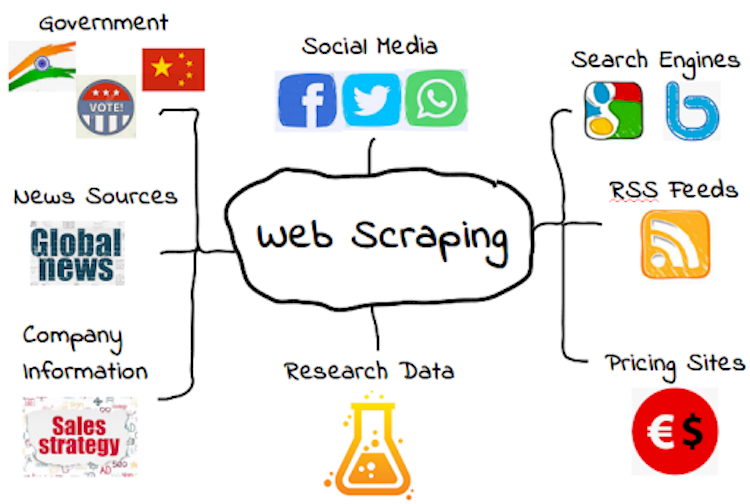



**Web scraping** is the process of using bots to extract content and data from a website. Unlike screen scraping, which only copies pixels displayed onscreen, web scraping extracts underlying HTML code and, with it, data stored in a database. The scraper can then replicate entire website content elsewhere.

Now, we will import the important libraries which will be helpful for scraping data from Amazon

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [ ]:
# setting up driver for opening chrome
s = Service('chromedriver.exe')
driver = webdriver.Chrome(service = s)

For Extracting Items from Different Pages
1. URL = https://www.amazon.com/
2. for products URL = https://www.amazon.com/s?k={macbook}
3. for pages URL = https://www.amazon.com/s?k=macbook&page={3}

In [ ]:
def url(product, page):
    url = 'https://www.amazon.in/s?k={}&page={}'
    return url.format(product, page)

In [ ]:
# We can extract as many pages data as we want
#for i in range(0,4):
    #print(url('batteries', i))
#driver.get(url('mobiles', 1))
#soup = BeautifulSoup(driver.page_source, 'lxml')    

In [ ]:
# Data Columns to extract
description = []
ratings = []
prices = []
review_counts =[]
image_url = []

In [ ]:
# we are extracting for 3 pages
for i in range(0,4):
    driver.get(url('mobiles', i))
    soup = BeautifulSoup(driver.page_source, 'lxml')  
    # Description
    des = soup.find_all('span', class_ = 'a-size-medium a-color-base a-text-normal')
    for i in des:
        if i is None:
            pass
        else: 
            description.append(i.text)

In [ ]:
len(description)

86

In [ ]:
for i in range(0,4):
    driver.get(url('mobiles', i))
    soup = BeautifulSoup(driver.page_source, 'lxml')  
# Ratings
    c = soup.find_all('div', class_ = ['sg-col sg-col-4-of-12 sg-col-8-of-16 sg-col-12-of-20 s-list-col-right','sg-col sg-col-4-of-12 sg-col-8-of-16 sg-col-12-of-20'])
    for r in c:
        rat = r.find('i', class_ =['a-icon a-icon-star-small a-star-small-4 aok-align-bottom',
                                     'a-icon a-icon-star-small a-star-small-4-5 aok-align-bottom',
                                     'a-icon a-icon-star-small a-star-small-3-5 aok-align-bottom'])
        if rat is None:
             ratings.append("NA")
        else:
            rate = rat.find('span', class_ = 'a-icon-alt')
            ratings.append(rate.text)

In [ ]:
len(ratings)

86

In [ ]:
for i in range(0,4):
    driver.get(url('mobiles', i))
    soup = BeautifulSoup(driver.page_source, 'lxml') 
# Review Counts
    c = soup.find_all('div', class_ = ['sg-col sg-col-4-of-12 sg-col-8-of-16 sg-col-12-of-20', 'sg-col sg-col-4-of-12 sg-col-8-of-16 sg-col-12-of-20 s-list-col-right'])
    for r in c:
            revcount = r.find('span', class_ = 'a-size-base')
            if revcount is None:
                review_counts.append("NA")
            else: 
                review_counts.append(revcount.text)

In [ ]:
len(review_counts)

86

In [ ]:
for i in range(0,4):
    driver.get(url('mobiles', i))
    soup = BeautifulSoup(driver.page_source, 'lxml') 
# Prices
    c = soup.find_all('div', class_ = ['sg-col sg-col-4-of-12 sg-col-8-of-16 sg-col-12-of-20', 'sg-col sg-col-4-of-12 sg-col-8-of-16 sg-col-12-of-20 s-list-col-right'])
    for r in c:
        price = r.find('span', class_ = 'a-price-whole')
        if price is None:
            prices.append("Na")
        else:
            prices.append(price.text)

In [ ]:
len(prices)

86

In [ ]:
for i in range(0,4):
    driver.get(url('mobiles', i))
    soup = BeautifulSoup(driver.page_source, 'lxml')
    c = soup.find_all('div', class_ ='a-section aok-relative s-image-fixed-height')
    for img in c:
        image = img.find('img', class_ = 's-image')
        image_url.append(image['src'])

In [ ]:
len(image_url)

86

In [ ]:
print(len(description))
print(len(ratings))
print(len(review_counts))
print(len(prices))
print(len(image_url))

86
86
86
86
86


In [ ]:
items = {'Description': description,
        'Ratings': ratings,
        'Price': prices,
        'Review Counts' : review_counts,
        'Image Url' : image_url}

In [ ]:
prod_df = pd.DataFrame(items)

In [ ]:
prod_df.dtypes

Description      object
Ratings          object
Price            object
Review Counts    object
Image Url        object
dtype: object

In [ ]:
prod_df

,Description,Ratings,Price,Review Counts,Image Url
0,"Samsung Galaxy M12 (Blue,6GB RAM, 128GB Storag...",4.1 out of 5 stars,"11,499","53,996",https://m.media-amazon.com/images/I/71r69Y7BSe...
1,"Samsung Galaxy M32 5G (Slate Black, 6GB RAM, 1...",3.9 out of 5 stars,"16,999","2,840",https://m.media-amazon.com/images/I/71QT7dSK4B...
2,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2 out of 5 stars,Na,"87,067",https://m.media-amazon.com/images/I/71sxlhYhKW...
3,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2 out of 5 stars,"8,499","100,657",https://m.media-amazon.com/images/I/71A9Vo1Bat...
4,"Samsung Galaxy M31 (Ocean Blue, 8GB RAM, 128GB...",4.2 out of 5 stars,"15,999","258,305",https://m.media-amazon.com/images/I/71-Su4Wr0H...
...,...,...,...,...,...
81,"realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...",3.7 out of 5 stars,Na,429,https://m.media-amazon.com/images/I/71yXShgxvp...
82,"realme narzo 30 (Racing Blue, 6GB RAM, 128GB S...",4.0 out of 5 stars,"7,499","2,555",https://m.media-amazon.com/images/I/61PGb+YfZW...
83,Lava A1 Super 21-Dual Sim |Loud Sound| Number ...,3.9 out of 5 stars,"15,499",11,https://m.media-amazon.com/images/I/71AwWtT5AU...
84,"iQOO Z5 5G (Mystic Space, 8GB RAM, 128GB Stora...",4.2 out of 5 stars,"1,107",910,https://m.media-amazon.com/images/I/51ryWz45nI...


# Data Cleaning

In [7]:
prod_df.dtypes

Description       object
Specification     object
Ratings          float64
Price             object
Review Counts    float64
Image Url         object
Prices            object
dtype: object

In [8]:
prod_df['Prices'] = prod_df['Price'].str.replace(',', '')

In [9]:
prod_df['Prices']=pd.to_numeric(prod_df['Prices'], errors = 'coerce').astype('Int64')# for converting it to int value
prod_df['Review Counts']=pd.to_numeric(prod_df['Review Counts'], errors = 'coerce').astype('Int64')

In [17]:
prod_df.head()

,Description,Specification,Ratings,Price,Review Counts,Image Url,Prices
0,Samsung Galaxy M12,"Black,6GB RAM, 128GB Storage 6 Months Free Scr...",4.1,"11,499",52710,https://m.media-amazon.com/images/I/7162Y5fPdk...,11499
1,Samsung Galaxy M32 5G,"Slate Black, 6GB RAM, 128GB Storage",3.9,"16,999",2420,https://m.media-amazon.com/images/I/71QT7dSK4B...,16999
2,Redmi 9,"Sky Blue, 4GB RAM, 64GB Storage | 2.3GHz Media...",4.2,"8,499",100011,https://m.media-amazon.com/images/I/71A9Vo1Bat...,8499
3,Samsung Galaxy M31,"Ocean Blue, 8GB RAM, 128GB Storage 6 Months Fr...",4.2,"15,999",257906,https://m.media-amazon.com/images/I/71-Su4Wr0H...,15999
4,Samsung Galaxy M12,"Blue,4GB RAM, 64GB Storage 6000 mAh with 8nm P...",4.1,"9,499",52710,https://m.media-amazon.com/images/I/71r69Y7BSe...,9499


In [ ]:
# Save Results to EXCEL File
# writing to Excel
#datatoexcel = pd.ExcelWriter('123.xlsx')
# write DataFrame to excel
#prod_df.to_excel(datatoexcel, index = False)
# save the excel
#datatoexcel.save()

In [14]:
# Creating list for inserting values into Table of Database
specs = list(prod_df['Specification'])
des = list(prod_df['Description'])
rat = list(prod_df['Ratings'])
pr = list(prod_df['Price'])
rc = list(prod_df['Review Counts'])
iu = list(prod_df['Image Url'])
pri = list(prod_df['Prices'])

In [15]:
# Mysql Library for Sql queries and Connections
#pip install pymysql

## Now we will store all the data in to mysql Database

In [ ]:
import pymysql

In [ ]:
# Establishing Connection with DataBase
#pymysql.connect(h,u,p,db, port)
scrap_db = pymysql.connect(host='localhost',
        user='root',
        db='amazon_scraped_data')

In [ ]:
# Creating Table Using SQL Query and executing ursor function 
cursor = scrap_db.cursor()
cursor.execute("DROP TABLE IF EXISTS Amazon_Product_Data")
sql = """CREATE TABLE Amazon_Product_Data(Description VARCHAR(50),
        Specification VARCHAR(20),
        Ratings VARCHAR(5),
        PRICE VARCHAR(10),
        REVIEW_COUNTS INT(10),
        IMG_URL VARCHAR(100),
        PRICE_INT INT(10))"""
cursor.execute(sql)

0

In [ ]:
my_sql_insert = '''INSERT INTO Amazon_Product_Data (Description, Specification, Ratings, PRICE, REVIEW_COUNTS, IMG_URL, PRICE_INT) VALUES(%s, %s,%s, %s, %s, %s, %s)'''
# insertingmultiple rows using loops or exceutemany() can be used
j = 1
for i in range(len(des)):
    x = [des[i], specs[i], rat[i], pr[i], rc[i], iu[i], pri[i]]
    cursor.execute(my_sql_insert, x)
    j= j+1
scrap_db.commit()
print(j, "Record inserted successfully into Amazon_Product_Data table")

87 Record inserted successfully into Amazon_Product_Data table
